<h1><center>Basic Statistics Assignment-1</center></h1>

# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
# Load csv file to analyse the data
import pandas as pd
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
df.info() # to identify data types of the columns in the data frame and any null values present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


# Discreptive Analytics for Numerical Columns

1. Volume- integer
2. Avg Price - integer
3. Total Sales Value - integer
4. Discount Rate(%) - float
5. Discount Amount - float
6. Net Sales Value - float

These 6 columns are numerical columns from the given sales data.

In [4]:
# prompt: Calculate the mean, median, mode, and standard deviation for these numerical columns.

numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

for column in numerical_columns:
  print(f"\nDescriptive statistics for {column}:")
  print(f"Mean: {df[column].mean()}")
  print(f"Median: {df[column].median()}")
  print(f"Mode: {df[column].mode()[0]}")  # Access the first mode value if multiple exist
  print(f"Standard Deviation: {df[column].std()}")



Descriptive statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Descriptive statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Descriptive statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Descriptive statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Descriptive statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Descriptive statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


In [5]:
# taking a new data frame that contains only numerical columns
df_numerical = df.select_dtypes(include=['number'])
df_numerical.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


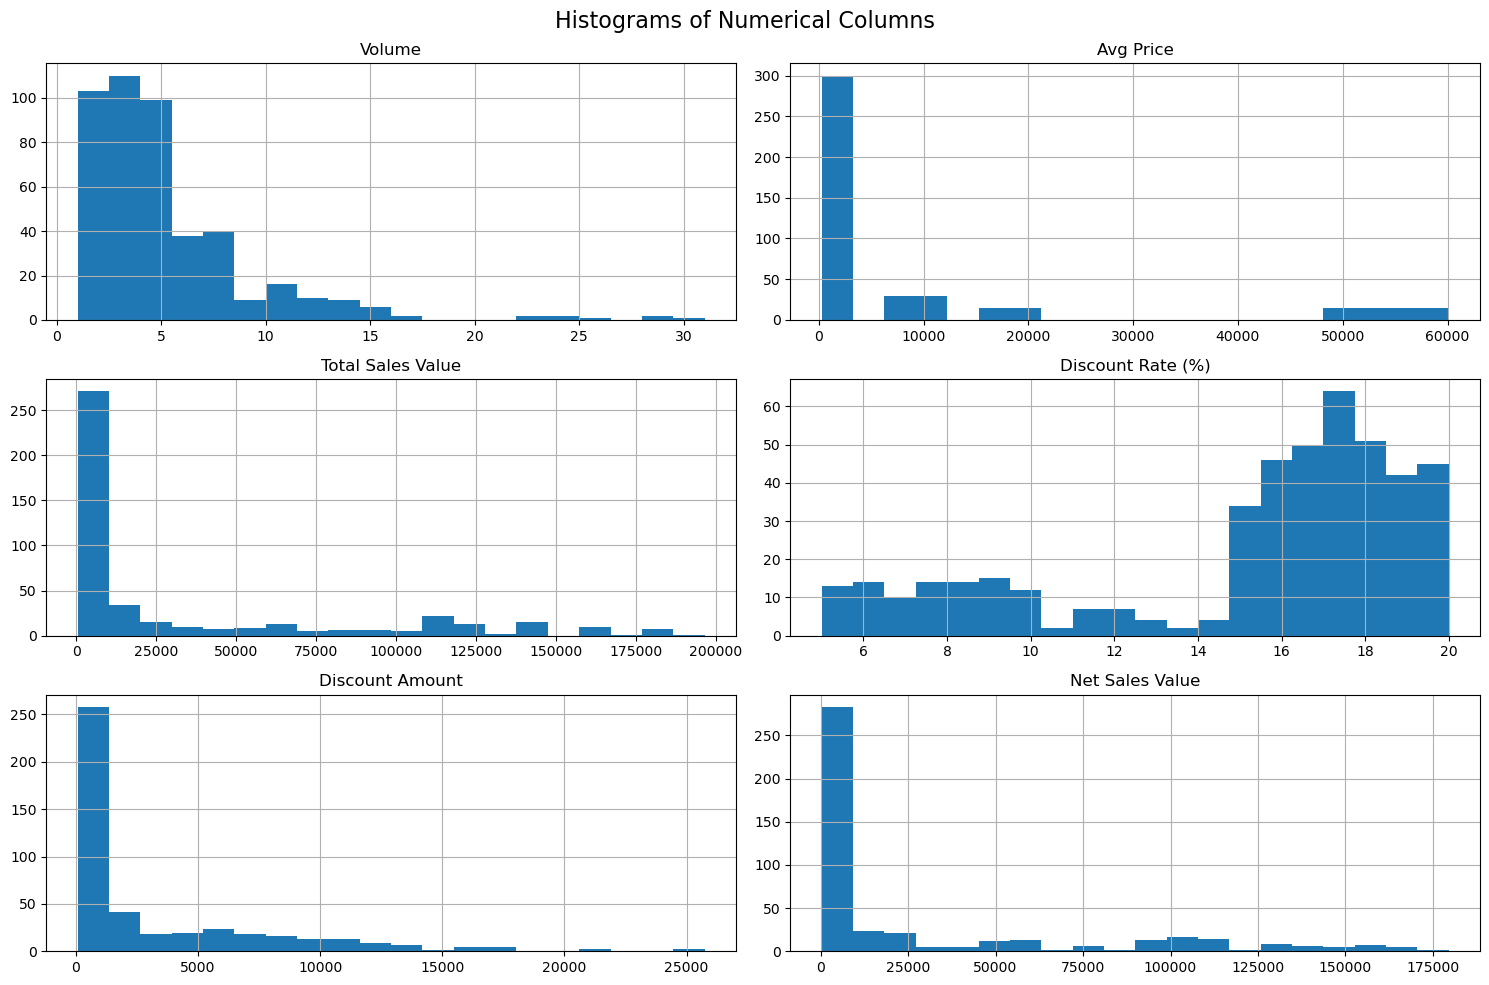

In [8]:
import matplotlib.pyplot as plt

df_numerical.hist(bins=20, figsize=(15, 10))  # Each subplot is automatically titled with the column name
plt.suptitle("Histograms of Numerical Columns", fontsize=16)  # Overall title
plt.tight_layout()  # Adjust layout to fit suptitle
plt.show()


Statistical Interpretation of Numerical columns:
1. Volume- This data is positively skewed with most sales being small in quantity but some larger outliers
2. Avg Price - It is also positively skewed a few very expensive items, which pull the mean upward but most prices are actually much lower.
3. Total Sales Value - It is also positively skewed and most sales are lower in value, but some very large sales inflate the average and spread.
4. Discount Rate(%) - Discount rates tend to hover around 15–17%, with a peak near 5%. The low standard deviation suggests discount rates are relatively consistent, though some variance exists.
5. Discount Amount - It is Positively skewed most discounts are small, but a few large ones raise the average and variability significantly.
6. Net Sales Value - positively skewed and a small number of large sales push up the mean and standard deviation, while most transactions are smaller.

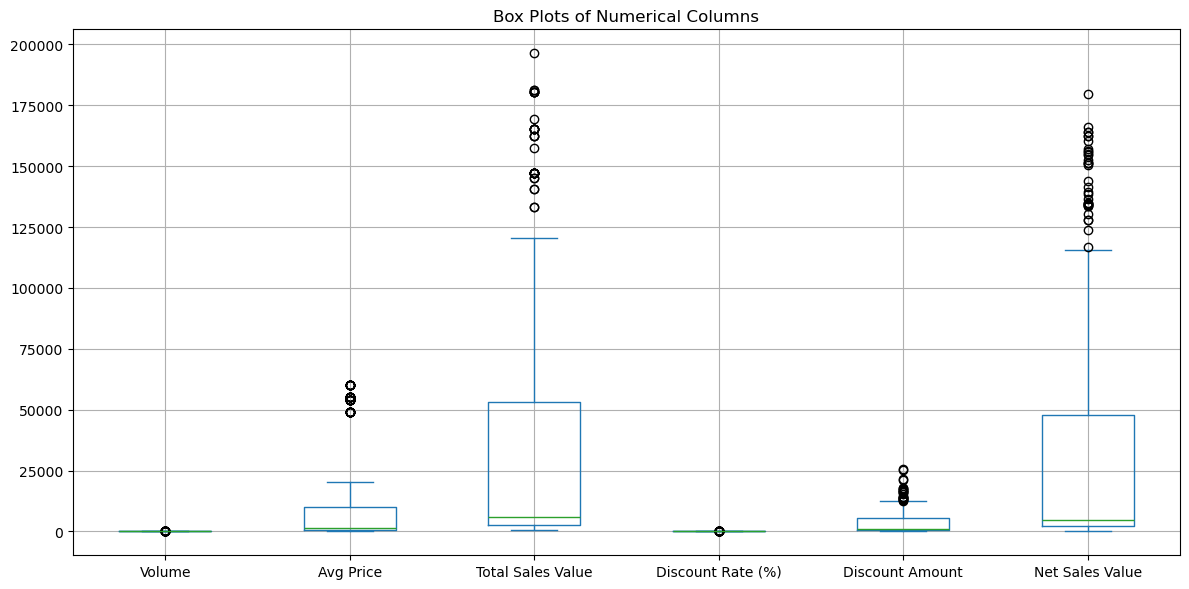

In [17]:
# import matplotlib.pyplot as plt
df_numerical.plot.box(figsize=(12, 6)) # plots box plots for all numerical columns in the dataframe and sets the size in inches
plt.title("Box Plots of Numerical Columns")
plt.xticks(rotation=0)  # Rotate labels if needed
plt.grid(True) # turns on the grid lines for easier understanding of the boxplots
plt.tight_layout() # adjusts spacing between the elements to prevent overlap
plt.show()  # display the final box plot


Most values are small, but a few very large ones push up the averages.
Volume and Discount Rate (%) are generally stable with low variation.
Avg Price, Sales Values, and Discount Amount show big differences between typical and extreme values.
There are many outliers, especially in pricing and sales figures.
This means a small number of high-priced or high-value sales are having a big impact on the data.

In [19]:
df_categorical = df.select_dtypes(include=['object', 'category'])
df_categorical.head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


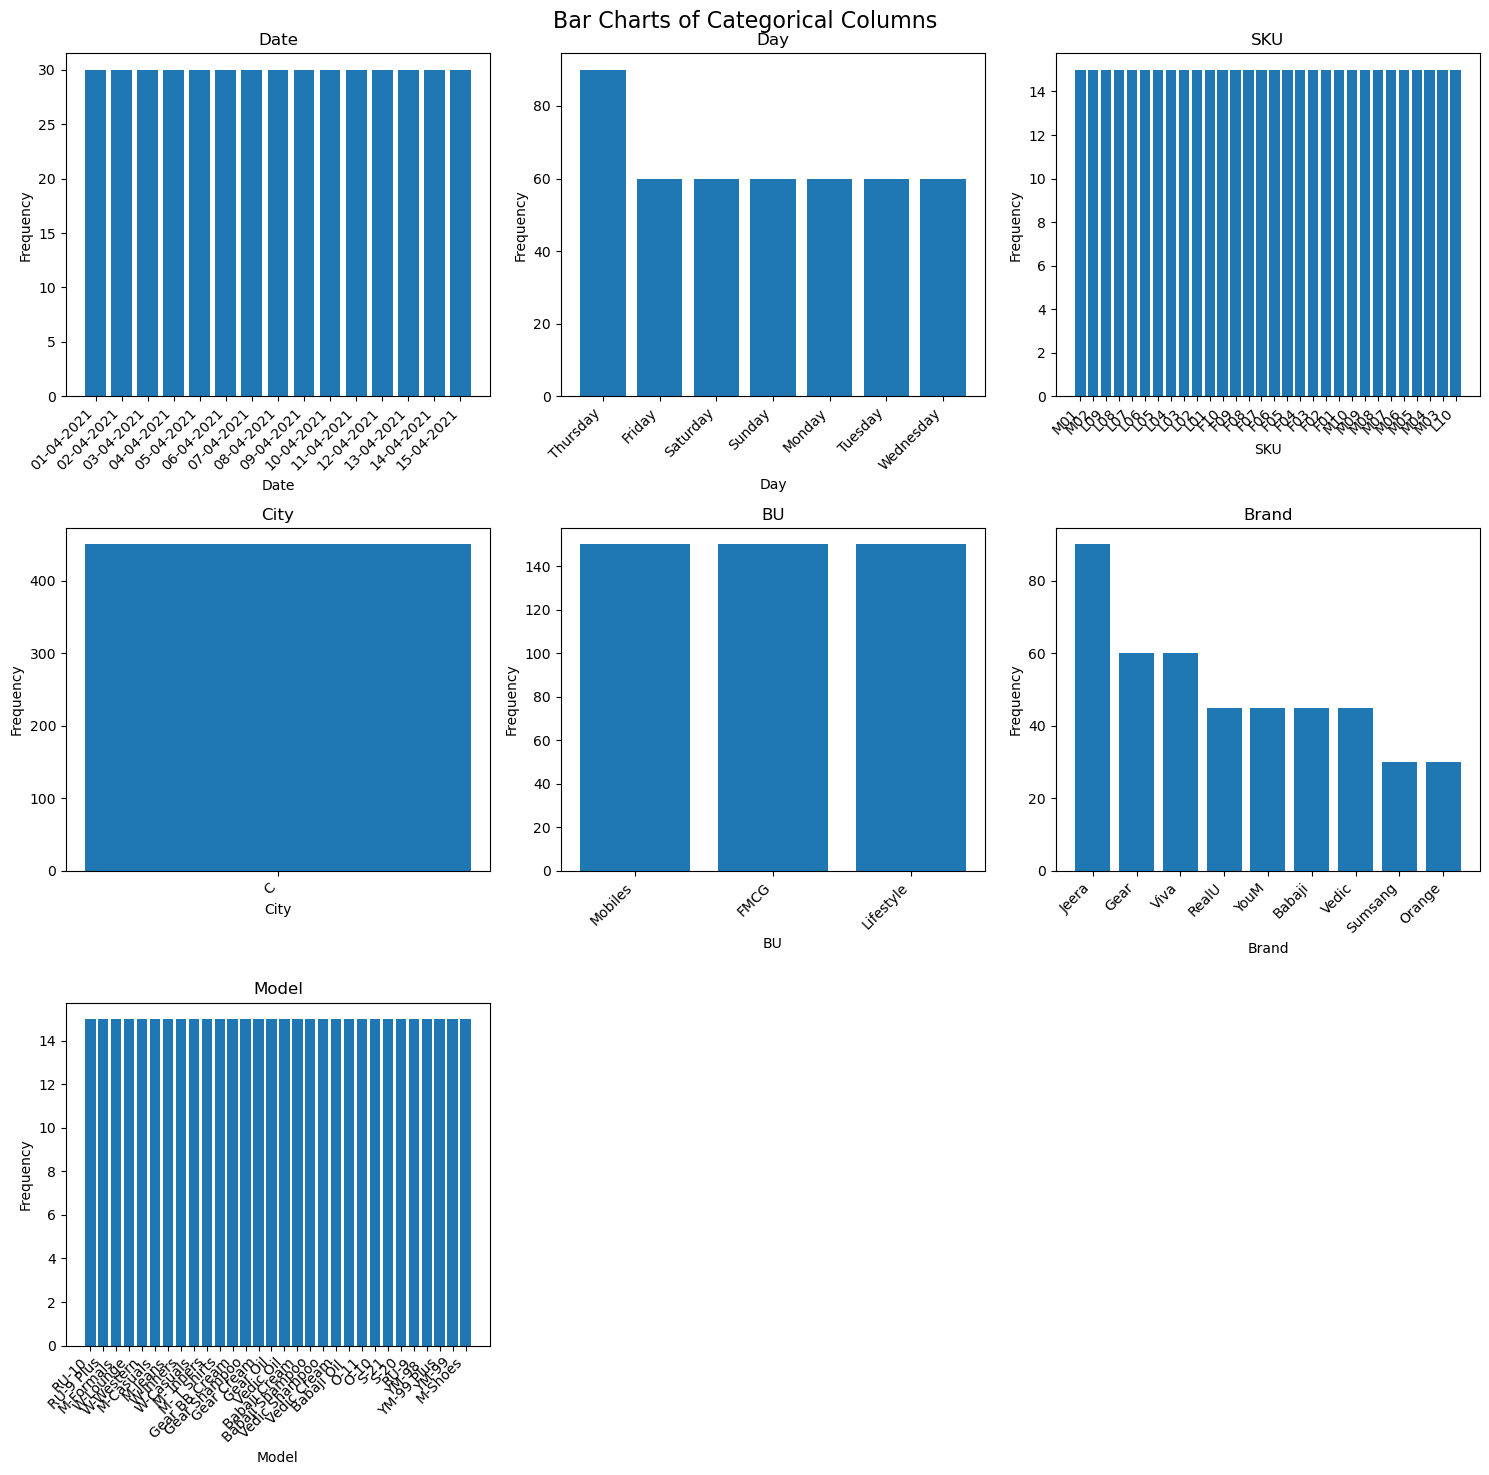

In [24]:
# Identify categorical columns in the dataset. subplot bar charts to visualize the frequency or count of each category.

# import matplotlib.pyplot as plt
# Identify categorical columns
# categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Create subplots for bar charts
num_cols = len(df_categorical.columns)
num_rows = (num_cols + 2) // 3  # Calculate rows to fit all columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Bar Charts of Categorical Columns', fontsize=16)

for i, column in enumerate(df_categorical.columns):
    row = i // 3
    col = i % 3

    # Count the frequency of each category
    value_counts = df_categorical[column].value_counts()

    # Create a bar chart
    axes[row, col].bar(value_counts.index, value_counts.values)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    plt.setp(axes[row, col].get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels

# Remove any unused subplots
for i in range(num_cols, num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


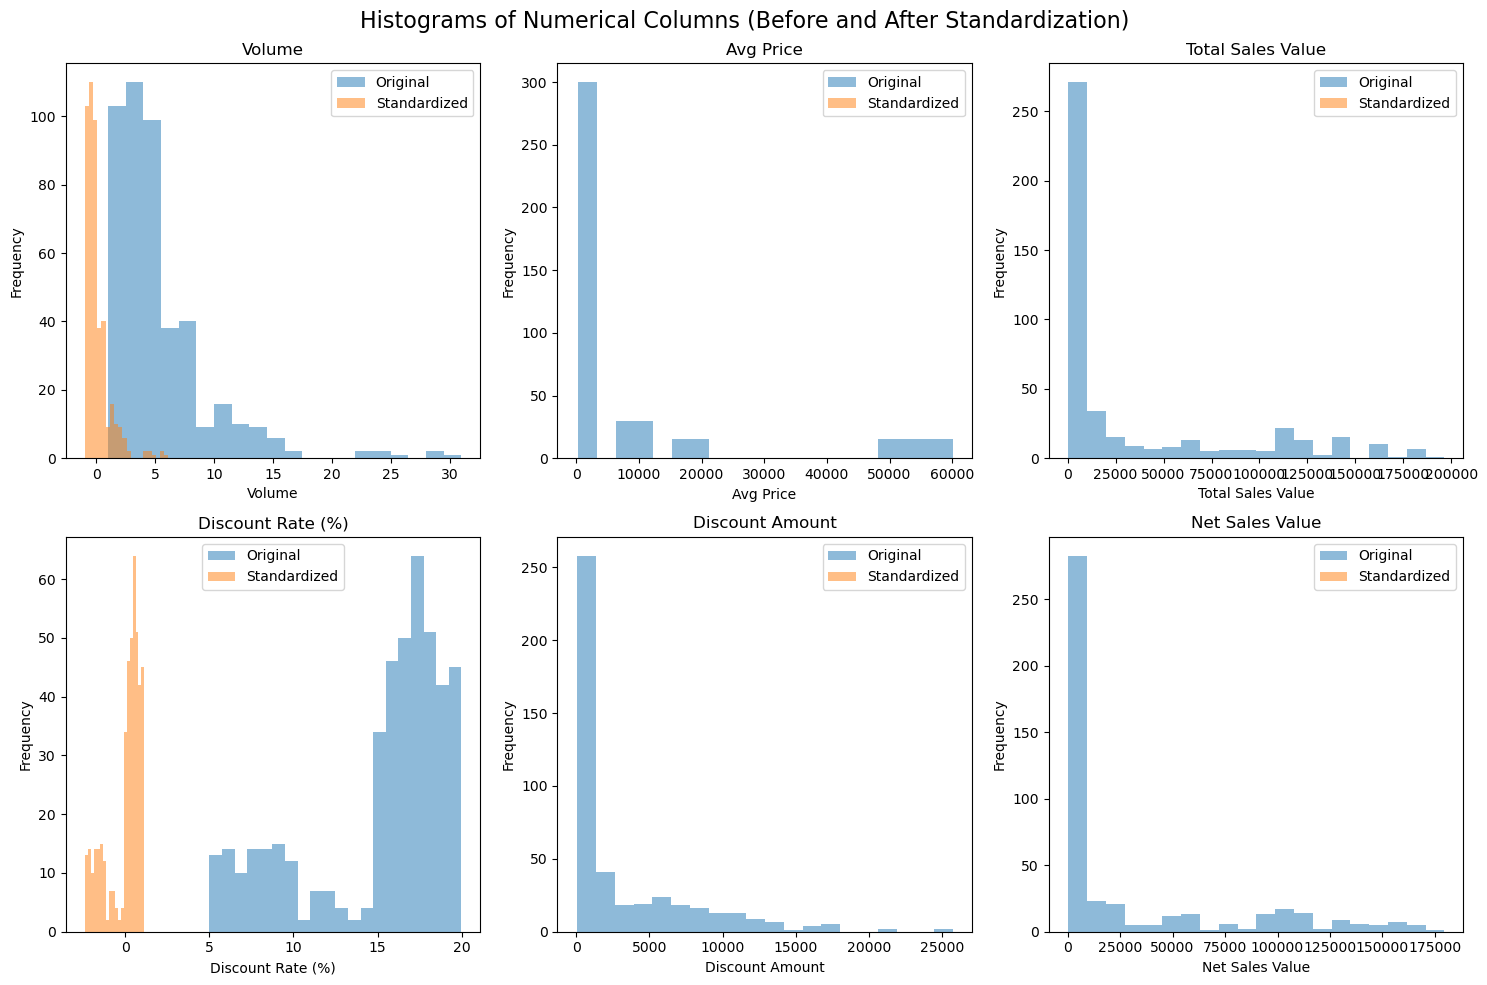

In [27]:
# Standardizing the numerical columns using the formula: z=x-mu/sigma .comparing of before and after the data distributions using histograms.

# import matplotlib.pyplot as plt

# Standardize the numerical columns
for column in df_numerical.columns:
  df_numerical[column + '_standardized'] = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()

original_columns = [col for col in df_numerical.columns if not col.endswith('_standardized')]
# Compare before and after distributions using histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Histograms of Numerical Columns (Before and After Standardization)', fontsize=16)

for i, column in enumerate(original_columns):
  row = i // 3
  col = i % 3

  # Original distribution
  axes[row, col].hist(df_numerical[column], bins=20, alpha=0.5, label='Original')

  # Standardized distribution
  axes[row, col].hist(df_numerical[column + '_standardized'], bins=20, alpha=0.5, label='Standardized')

  axes[row, col].set_title(column)
  axes[row, col].set_xlabel(column)
  axes[row, col].set_ylabel('Frequency')
  axes[row, col].legend()

plt.tight_layout()
plt.show()


> Volume, Avg Price, Sales, and Discount Amount all have lots of small values and a few very large ones (this means they are skewed).

> Standardization made all the data centered around zero but didn’t change the shape much.

> Discount Rate (%) looks more balanced and less skewed.

> Even after standardizing, some columns still have extreme values.

C:\Users\lurvi\AppData\Local\Temp\ipykernel_25980\3971959093.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(df_numerical[column], positions=[1], labels=['Original'])
C:\Users\lurvi\AppData\Local\Temp\ipykernel_25980\3971959093.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(df_numerical[column + '_standardized'], positions=[2], labels=['Standardized'])
C:\Users\lurvi\AppData\Local\Temp\ipykernel_25980\3971959093.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[row, col].boxplot(df_numerical[column], positions=[1], labels=['Original'])
C:\Users\lurvi\App

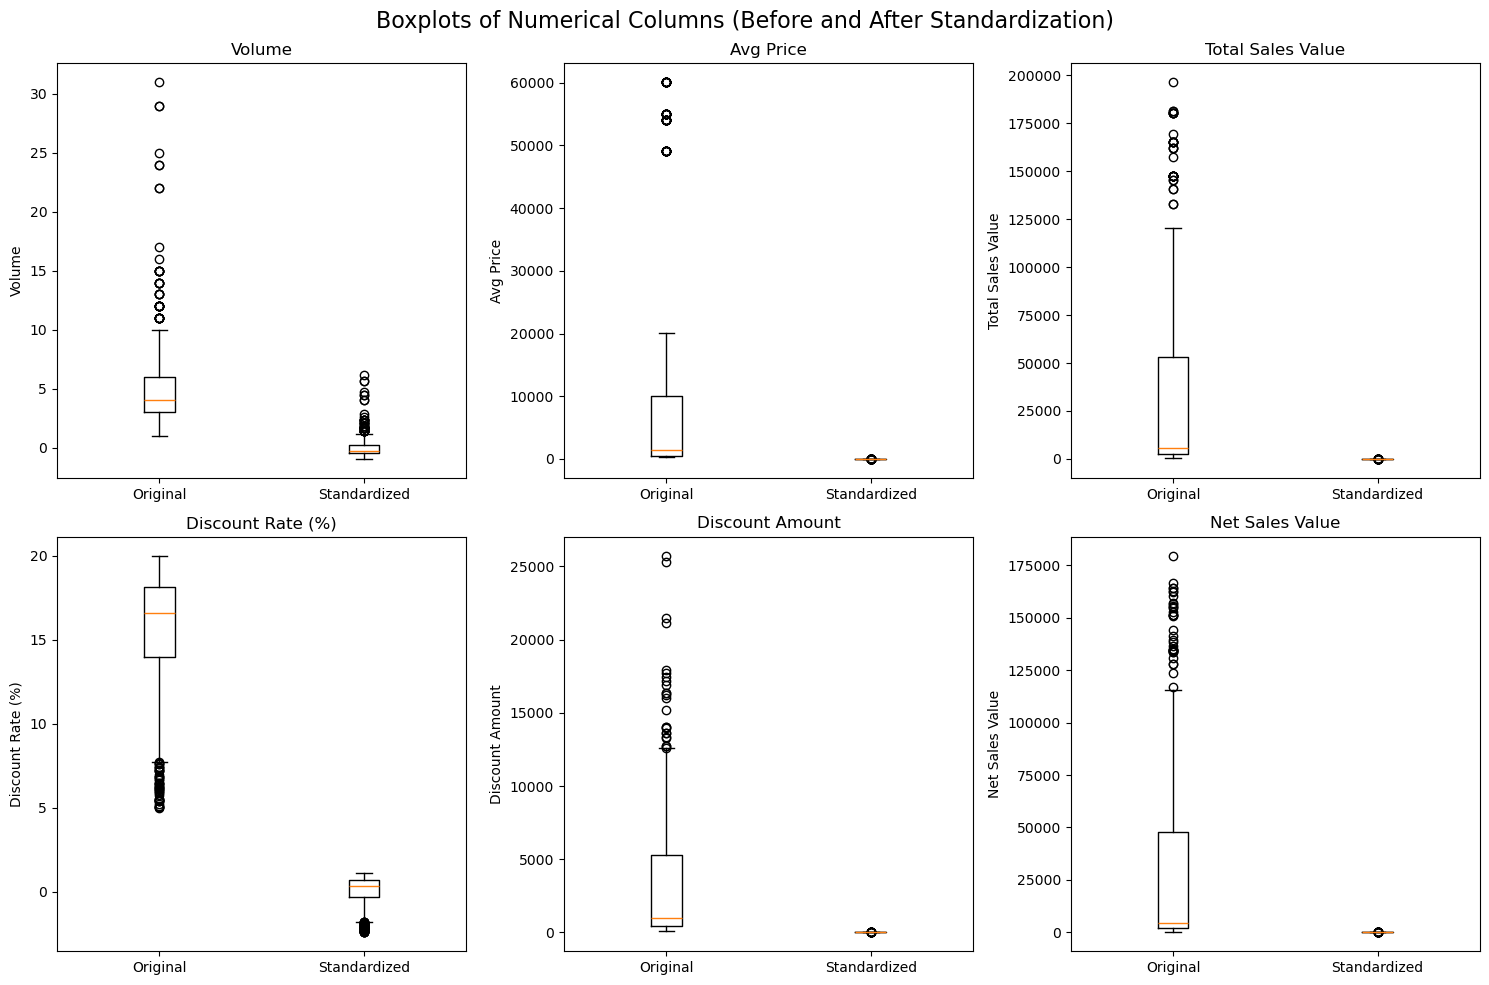

In [28]:
# Comparing before and after distributions using boxplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplots of Numerical Columns (Before and After Standardization)', fontsize=16)

for i, column in enumerate(original_columns):
  row = i // 3
  col = i % 3

  # Original distribution
  axes[row, col].boxplot(df_numerical[column], positions=[1], labels=['Original'])

  # Standardized distribution
  axes[row, col].boxplot(df_numerical[column + '_standardized'], positions=[2], labels=['Standardized'])

  axes[row, col].set_title(column)
  axes[row, col].set_ylabel(column)


plt.tight_layout()
plt.show()

> Standardization makes it easier to compare features by putting them on the same scale.

> It reduces the impact of outliers and large differences in units.

> Patterns like skewness and variability are still visible, but in a cleaner, comparable way.

In [30]:
# Identify categorical columns
# categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_categorical, columns=categorical_columns, drop_first=True)

# Convert all boolean columns to integers (0/1)
df_encoded = df_encoded.astype(int)

# Display a portion of the transformed dataset
print(df_encoded.head())

   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_10-04-2021  Date_11-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                0                0  ...  

> Most machinelearning models can't understand text data.

> One hot encoding translates text into numbers the model can understand.

> It avoids confusion and helps the model learn correctly from data.

## Conclusion:
Data preprocessing is essential in machine learning. Standardization puts numerical features on the same scale, and one-hot encoding turns categories into numbers the model can understand. These steps help models learn better, make more accurate predictions, and avoid errors caused by raw or inconsistent data.